# Laden von Paketen

In den folgenden Code-Blöcken werden Pakete sowie einige Einstellungen zum Benutzen von Jupyter Notebooks geladen. Diese Code-Zeilen sollten einfach so wie voreingestellt ausgeführt werden.<br><br>Zum Kennenlernen der Bedienung von Jupyter Notebooks folgen anbei 2 Links

[Einführung Jupyter Notebooks 1](https://www.dataquest.io/blog/jupyter-notebook-tutorial/)<br><br>
[Einführung Jupyter Notebooks 2](https://tacc.github.io/CSC2017Institute/docs/day1/jupyter.html)

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import warnings
warnings.filterwarnings('ignore')

C:\Users\vojo620\AppData\Local\Temp\ipykernel_17040\4172614641.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [4]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import mean_squared_error,accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.tree import export_graphviz
from subprocess import call
from IPython.display import Image
from scipy.integrate import odeint
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
%matplotlib inline



In [5]:
mpl.rc('figure', max_open_warning = 0)
mpl.rcParams['figure.figsize']=(25,10)
rc={'figure.figsize':(20,10),
'axes.titlesize':26,
'legend.fontsize':26,
'axes.labelsize':26,
'axes.labelweight':'bold',
'xtick.labelsize':20,
'ytick.labelsize':20,
'lines.linewidth':5,
'axes.facecolor': '.9',
'grid.linestyle': '--',
'grid.linewidth': 2

}
mpl.rcParams.update(rc)
plt.style.use('seaborn-darkgrid')


# Python Intro

Beispielcode zu verschiedenen Python-Konzepten

## Variable types

### Lists

In [ ]:
list_of_variables = ['Hallo','am','Campus','Burghausen','der','TH','Rosenheim']

In [ ]:
list_of_variables

In [ ]:
list_of_variables[2]

In [ ]:
list_of_variables[0]

In [ ]:
list_of_variables[1:3]

In [ ]:
list_of_variables[-2:]

### Strings

In [ ]:
tag_string = 'T1234'

In [ ]:
tag_string

In [ ]:
tag_string[2:]

### Dictionary

In [ ]:
dummy_dictionary={'Hase':'rabbit','Baum':'Tree','Zug':'Train'}

In [ ]:
dummy_dictionary['Baum']

In [ ]:
Variablen_translator={"good":"black", "bad":"red"}

In [ ]:
Variablen_translator['good']

## Iteration

In [ ]:
for i in range(4):
    print(i)

In [ ]:
for var in list_of_variables:
    print(var)

## Functions

In [ ]:
def dummy_function(x):
    y = 2 * x
    return y

In [ ]:
result = dummy_function(10)

In [ ]:
print(result)

# Aufgabe 1

Laden Sie die die beiden Dateien "Example_Process_Data.xlsx" und "Example_Quality_data.xlsx" in ein Pandas-Dataframe!<br> Hinweis: Ergänzen Sie den Aufruf des entsprechenden Befehls um ein Argument, so dass für die Index-Spalte des DataFrame die 1.Spalte der Excel-Datei verwendet wird!
<br><br> Hinweise zum Szenario: Sie finden in den Dateien den Temperaturverlauf zur Aufheizung für den Start einer chemischen Reaktion für 500 Batche. Dazu wird für jeden Batch angegeben, ob dieser "gut" oder "schlecht" gelaufen ist. Ziel wird sein, aus dem Temperaturverlauf abzuleiten, wie die Qualität der Batches war um so später ein prädiktives Modell während des Prozesses mitlaufen lassen zu können

Hinweise zur Lösung<br><br>
[https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html)

In [6]:
process_data = pd.read_excel('Example_Process_Data.xlsx', index_col = 0)
quality_data = pd.read_excel('Example_Quality_data.xlsx', index_col = 0)

# Aufgabe 2

Plotten Sie alle Temperaturverläufe gegen die Prozesszeit!

Hinweise zur Lösung <br><br>[https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html)

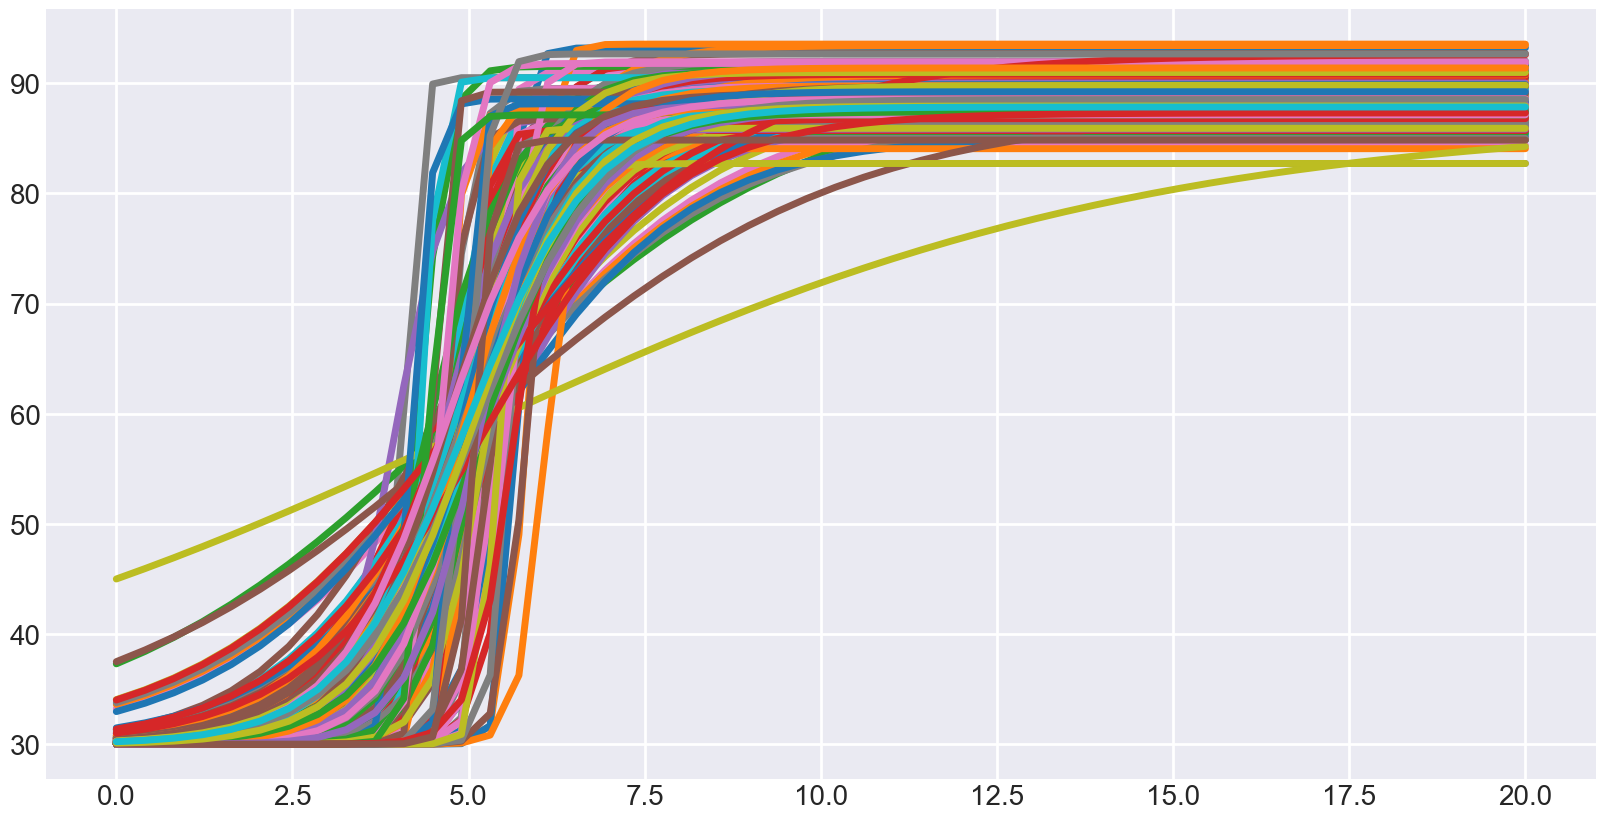

In [32]:
fig, ax1 = plt.subplots()
ax1.plot(process_data);

# Aufgabe 3

Wiederholen Sie das plotten und färben diesmal alle Batches der Qualität "good" bzw. der Qualität "bad" mit derselben Farbe ein!<br><br>Können Sie anhand der Darstellung bereits Aussagen treffen, was wohl zu einem guten bzw. schlechten Ergebnis geführt hat?

Hinweise zur Lösung<br><br>Setzen von Farben in Matplotlib-Plots (Abschnitt Colors): [https://www.w3schools.com/python/matplotlib_scatter.asp](https://www.w3schools.com/python/matplotlib_scatter.asp)
<br><br> Erstellen Sie ein Dictionary, dass den Eintrag "good" bzw. "bad" in eine Farbe übersetzt! Iterieren Sie über alle Einträge im Dataframe und führen die Übersetzung jedesmal neu aus!

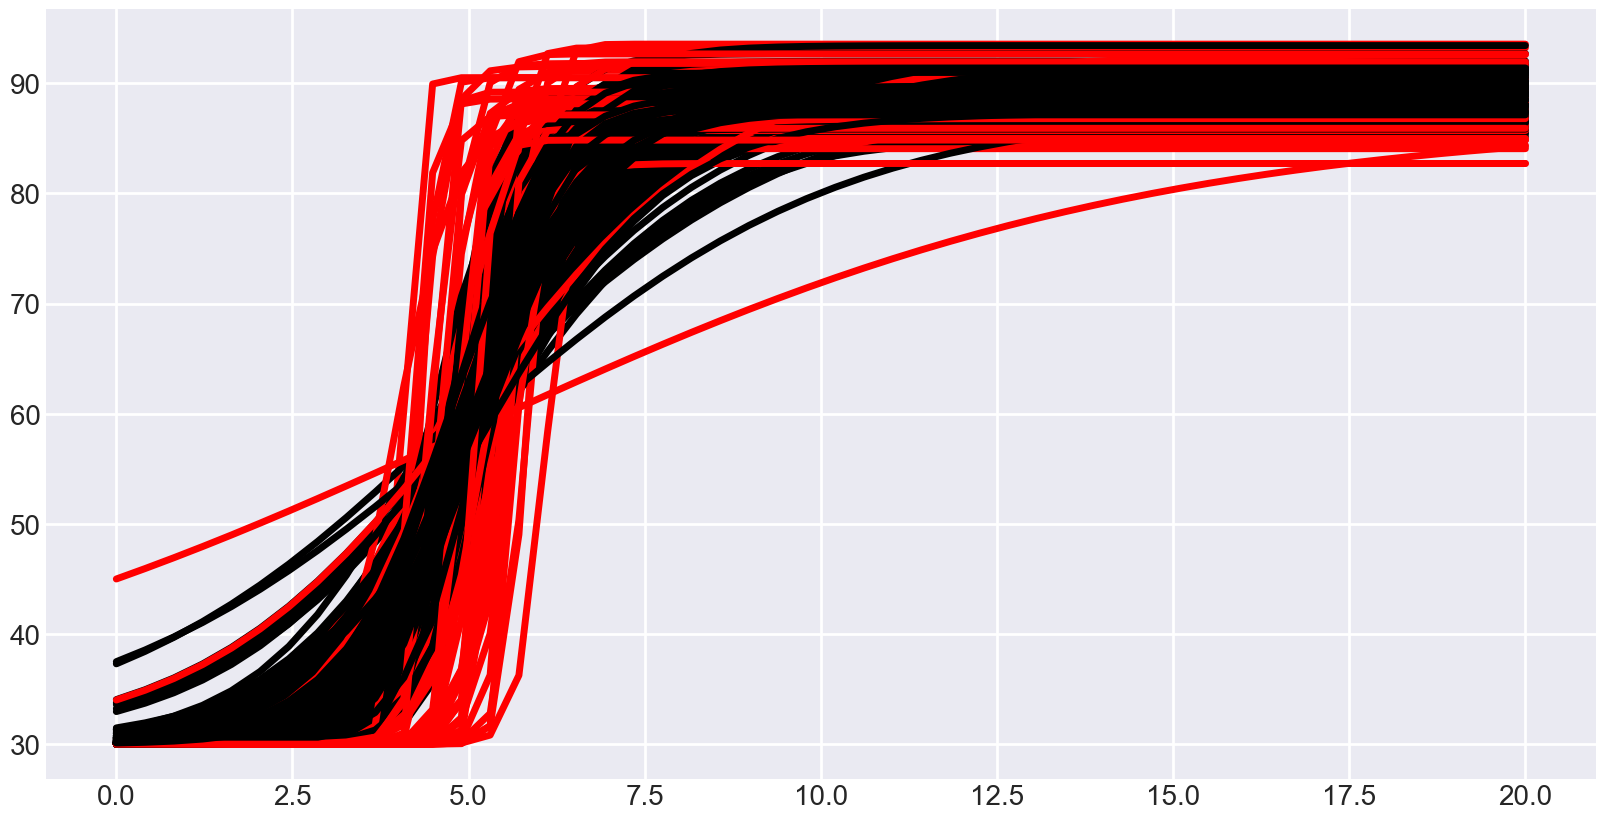

In [29]:
colors = {'good':'black', 'bad':'red'}
fig, ax1 = plt.subplots()
for i in process_data.columns:
    ax1.plot(process_data.index,process_data[i], color=colors[quality_data.loc[i,'Quality']]);

In [33]:
quality_data['Quality'] == 'bad'

Batch_1      False
Batch_2      False
Batch_3      False
Batch_4      False
Batch_5      False
             ...  
Batch_496     True
Batch_497    False
Batch_498    False
Batch_499    False
Batch_500    False
Name: Quality, Length: 500, dtype: bool

In [34]:
quality_data[quality_data['Quality'] == 'bad']

,Quality
Batch_16,bad
Batch_28,bad
Batch_31,bad
Batch_41,bad
Batch_48,bad
Batch_57,bad
Batch_107,bad
Batch_111,bad
Batch_124,bad
Batch_128,bad


In [35]:
quality_data[quality_data['Quality'] == 'bad'].index

Index(['Batch_16', 'Batch_28', 'Batch_31', 'Batch_41', 'Batch_48', 'Batch_57',
       'Batch_107', 'Batch_111', 'Batch_124', 'Batch_128', 'Batch_131',
       'Batch_154', 'Batch_168', 'Batch_179', 'Batch_187', 'Batch_212',
       'Batch_214', 'Batch_242', 'Batch_243', 'Batch_255', 'Batch_267',
       'Batch_277', 'Batch_312', 'Batch_331', 'Batch_352', 'Batch_356',
       'Batch_369', 'Batch_376', 'Batch_398', 'Batch_406', 'Batch_407',
       'Batch_410', 'Batch_412', 'Batch_414', 'Batch_437', 'Batch_438',
       'Batch_441', 'Batch_454', 'Batch_456', 'Batch_457', 'Batch_459',
       'Batch_469', 'Batch_471', 'Batch_474', 'Batch_478', 'Batch_483',
       'Batch_484', 'Batch_496'],
      dtype='object')

In [36]:
process_data[quality_data[quality_data['Quality'] == 'bad'].index]

,Batch_16,Batch_28,Batch_31,Batch_41,Batch_48,Batch_57,Batch_107,Batch_111,Batch_124,Batch_128,...,Batch_456,Batch_457,Batch_459,Batch_469,Batch_471,Batch_474,Batch_478,Batch_483,Batch_484,Batch_496
0.000000,30.001099,30.000000,30.000000,30.000001,30.000000,30.000000,30.000000,30.000000,30.495767,30.000000,...,30.000000,30.000000,30.000000,30.000017,30.000000,34.006797,30.000000,30.000000,30.000000,30.000000
0.408163,30.002855,30.000000,30.000000,30.000004,30.000000,30.000000,30.000001,30.000000,30.754247,30.000000,...,30.000000,30.000000,30.000000,30.000056,30.000000,34.893873,30.000000,30.000000,30.000001,30.000000
0.816327,30.007413,30.000000,30.000000,30.000015,30.000000,30.000000,30.000004,30.000000,31.144963,30.000000,...,30.000000,30.000000,30.000000,30.000179,30.000000,35.957381,30.000000,30.000000,30.000005,30.000000
1.224490,30.019247,30.000000,30.000000,30.000055,30.000000,30.000000,30.000020,30.000000,31.732308,30.000000,...,30.000000,30.000002,30.000000,30.000577,30.000000,37.223085,30.000000,30.000000,30.000020,30.000000
1.632653,30.049959,30.000000,30.000000,30.000206,30.000000,30.000001,30.000102,30.000000,32.607935,30.000000,...,30.000000,30.000015,30.000000,30.001860,30.000000,38.716336,30.000000,30.000000,30.000079,30.000000
2.040816,30.129567,30.000000,30.000000,30.000768,30.000000,30.000006,30.000524,30.000003,33.897310,30.000000,...,30.000000,30.000124,30.000000,30.005995,30.000000,40.460003,30.000001,30.000003,30.000309,30.000000
2.448980,30.335312,30.000001,30.000000,30.002865,30.000000,30.000053,30.002686,30.000025,35.761808,30.000000,...,30.000000,30.000995,30.000000,30.019321,30.000000,42.471778,30.000014,30.000050,30.001207,30.000000
2.857143,30.863002,30.000057,30.000001,30.010682,30.000000,30.000469,30.013762,30.000183,38.388431,30.000007,...,30.000004,30.007982,30.000000,30.062232,30.000001,44.760983,30.000169,30.000864,30.004723,30.000003
3.265306,32.190292,30.005820,30.000012,30.039809,30.000001,30.004180,30.070458,30.001356,41.955685,30.000112,...,30.000240,30.063989,30.000002,30.200083,30.000038,47.325211,30.002000,30.014955,30.018477,30.000073
3.673469,35.371339,30.590269,30.000223,30.148166,30.000047,30.037271,30.359314,30.010037,46.566891,30.001739,...,30.015701,30.509757,30.000054,30.639579,30.001443,50.147369,30.023682,30.257834,30.072229,30.001542


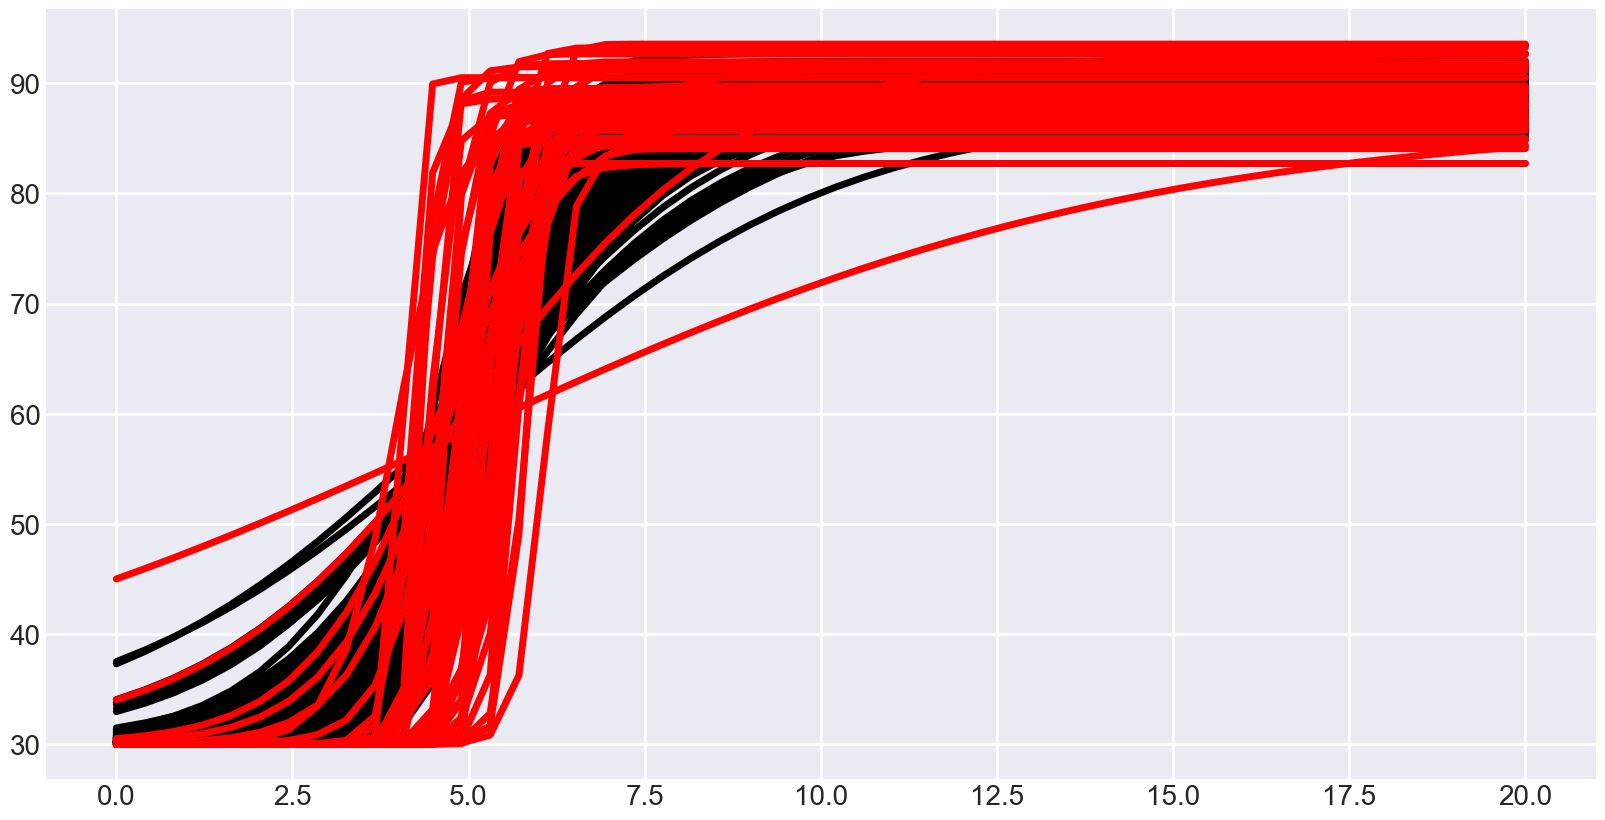

In [40]:
fig, ax1 = plt.subplots()
for var in quality_data['Quality'].unique():
    ax1.plot(process_data[quality_data[quality_data['Quality'] == var].index],color=colors[var]);

# Aufgabe 4

Erstellen Sie ein DataFrame, in dem Sie für jeden Batch entsprechende Feature abspeichern!<br><br>Vorschläge für Feature: Maximaler Wert, Minimaler Wert, Mittelwert zwischen maximalem und minimalem Wert, Median, Zeit bis Mittelwert erreicht wurde, Zeit bis 95% des Maximalwerts erreicht wurde, Zeit bis 5% über Minimalwert erreicht wurde, Dauer zwischen 5% über Minimalwert und 95% des Maximalwerts

Hinweise zur Lösung
<br><br>
Fügen Sie Spalte des Qualitätsparameters ebenfalls mit an!
<br><br>
[https://pythoninoffice.com/how-to-find-the-closest-value-to-an-input-in-pandas/](https://pythoninoffice.com/how-to-find-the-closest-value-to-an-input-in-pandas/)


In [42]:
feature_engineering_frame = pd.DataFrame(index=process_data.columns,columns=['max','mean','min','median','t_mean','t_0.95max','t_1.05min','t_delta_min_max','quality'])
for i in process_data.columns:
    feature_engineering_frame.loc[i,'max'] = max(process_data[i])
    feature_engineering_frame.loc[i,'mean'] = (max(process_data[i])+process_data[i].min()) / 2
    feature_engineering_frame.loc[i,'min'] = process_data[i].min()
    feature_engineering_frame.loc[i,'median'] = process_data[i].median()
    feature_engineering_frame.loc[i,'t_mean'] = process_data.index[(process_data[i] - feature_engineering_frame.loc[i,'mean']).abs().argsort()[0]]
    feature_engineering_frame.loc[i,'t_0.95max'] = process_data.index[(process_data[i] - 0.95*process_data[i].max()).abs().argsort()[0]]
    feature_engineering_frame.loc[i,'t_1.05min'] = process_data.index[(process_data[i] - 1.05*process_data[i].min()).abs().argsort()[0]]
    feature_engineering_frame.loc[i,'t_delta_min_max'] = feature_engineering_frame.loc[i,'t_0.95max'] - feature_engineering_frame.loc[i,'t_1.05min']
    feature_engineering_frame.loc[i,'quality'] = quality_data.loc[i,'Quality']
feature_engineering_frame

,max,mean,min,median,t_mean,t_0.95max,t_1.05min,t_delta_min_max,quality
Batch_1,87.568658,58.866257,30.163856,87.340146,5.306122,7.346939,2.040816,5.306122,good
Batch_2,87.938923,58.973588,30.008254,87.918825,5.306122,6.938776,3.265306,3.673469,good
Batch_3,89.10536,59.557008,30.008657,89.099272,4.897959,6.122449,2.857143,3.265306,good
Batch_4,88.022011,59.023734,30.025457,87.996487,4.897959,6.530612,2.44898,4.081633,good
Batch_5,87.768892,58.912366,30.05584,87.707701,4.897959,6.938776,2.44898,4.489796,good
...,...,...,...,...,...,...,...,...,...
Batch_496,84.84774,57.42387,30.0,84.84774,4.897959,5.714286,4.489796,1.22449,bad
Batch_497,88.594876,59.378239,30.161602,88.518747,4.489796,6.530612,2.040816,4.489796,good
Batch_498,88.529451,59.369963,30.210475,88.242688,5.306122,7.346939,2.040816,5.306122,good
Batch_499,87.942749,59.021144,30.09954,87.821796,4.897959,6.938776,2.040816,4.897959,good


# Aufgabe 5

Erstellen Sie einen Pairplot der ermittelten Feature und färben diesen entsprechend der Qualität des Batches ein! Können Sie hier bereits ableiten, welche Eigenschaften für eine Klassifizierung "gut" und "schlecht" geeignet sind?

Hinweise zur Lösung
<br><br>[https://seaborn.pydata.org/generated/seaborn.pairplot.html](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

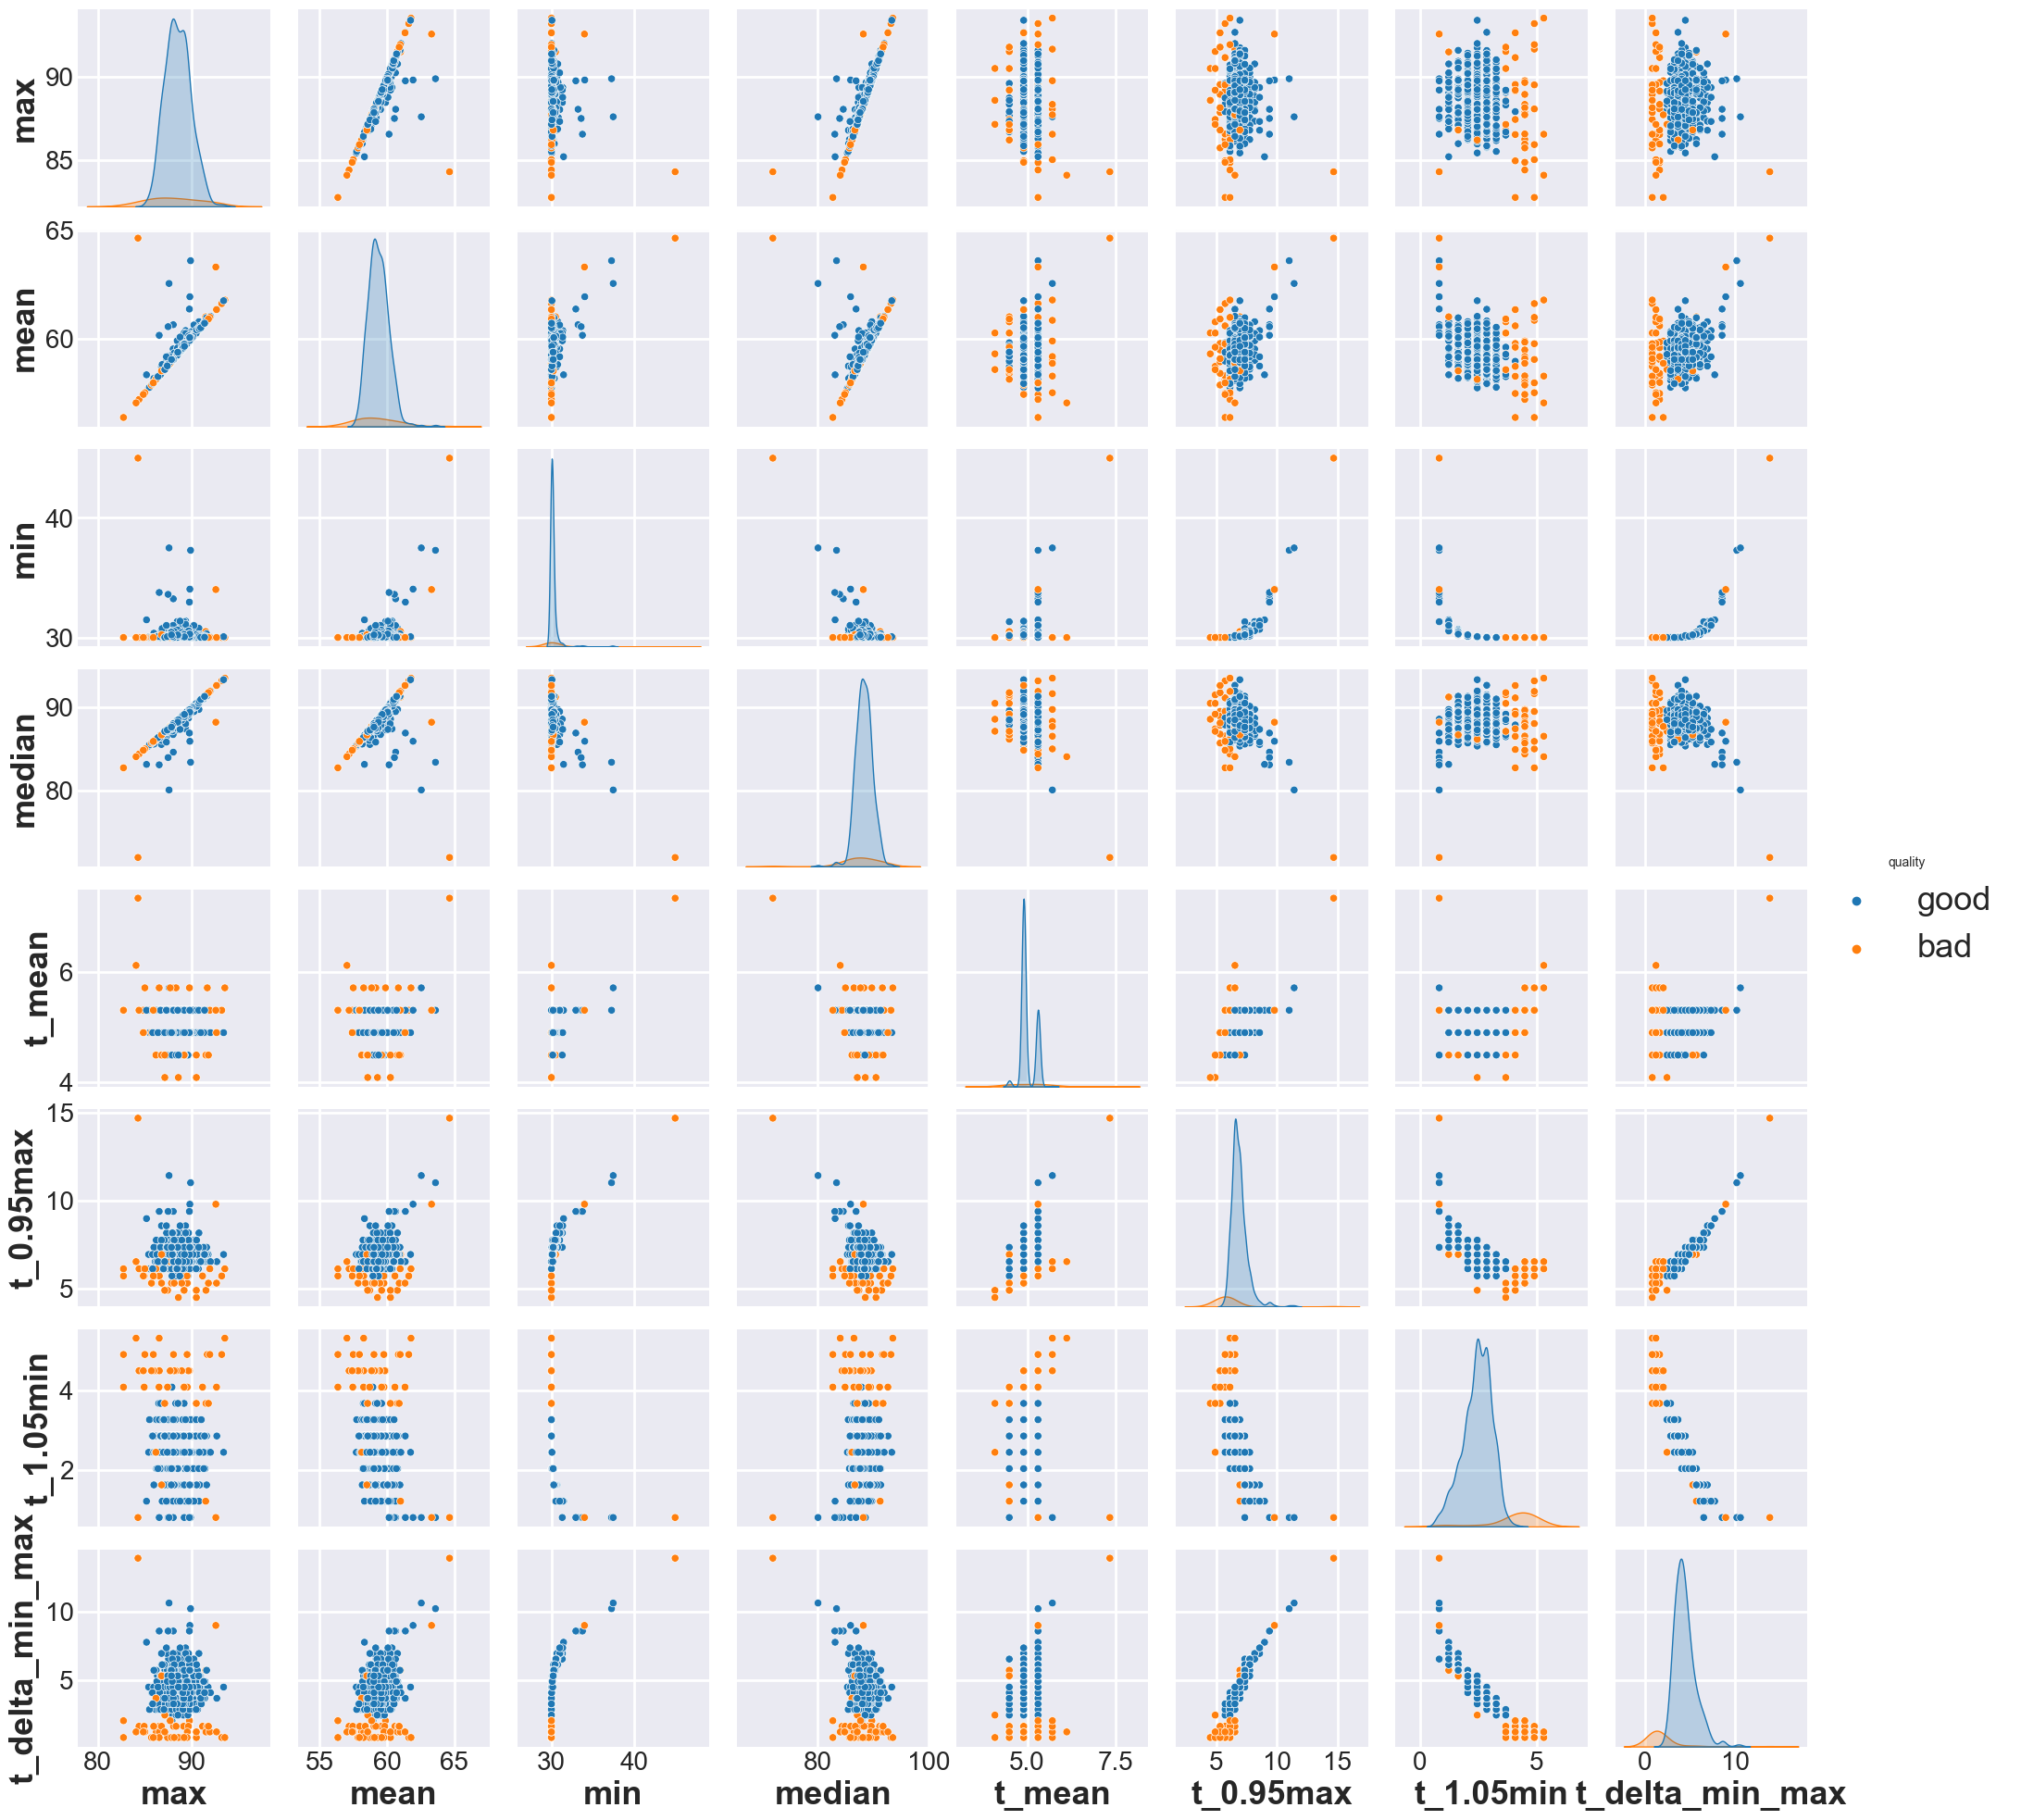

In [43]:
sns.pairplot(feature_engineering_frame,hue='quality')

# Aufgabe 6

Erstellen Sie ein Klassifizierungsmodell mit dem Typ "RandomForest" um die Batch-Qualität hervorzusagen und wählen dabei eine geeignete Größe des Trainingsatzes aus! Erstellen Sie ausserdem eine Ausgabe für die Wichtigkeit der Feature! Decken sich diese Ergebnisse mit der optischen Analyse in Aufgabe 5?

Hinweise zur Lösung
<br><br>
[https://www.datacamp.com/tutorial/random-forests-classifier-python](https://www.datacamp.com/tutorial/random-forests-classifier-python)

In [44]:
X = feature_engineering_frame[['max','mean','min','median','t_mean','t_0.95max','t_1.05min','t_delta_min_max']]
y = feature_engineering_frame['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5,shuffle=True)
model = RandomForestClassifier(n_estimators=10)
model.fit(X_train,y_train)
predictions_train = model.predict(X_train)
predictions_test = model.predict(X_test)
predictions_all = model.predict(X)
  
pd.DataFrame(model.feature_importances_, index=X_train.columns).sort_values(by=0, ascending=False)

,0
min,0.242894
t_mean,0.212081
t_1.05min,0.156252
t_0.95max,0.148815
t_delta_min_max,0.115117
mean,0.060907
max,0.056089
median,0.007845


# Aufgabe 7

Plotten Sie die Konfusionsmatrix und bewerten Sie ihr Modell!

Hinweise zur Lösung
<br><br>
[https://medium.com/analytics-vidhya/evaluating-a-random-forest-model-9d165595ad56](https://medium.com/analytics-vidhya/evaluating-a-random-forest-model-9d165595ad56)

Text(0.5, 1.0, 'Confusion Matrix for Random Forest Model')

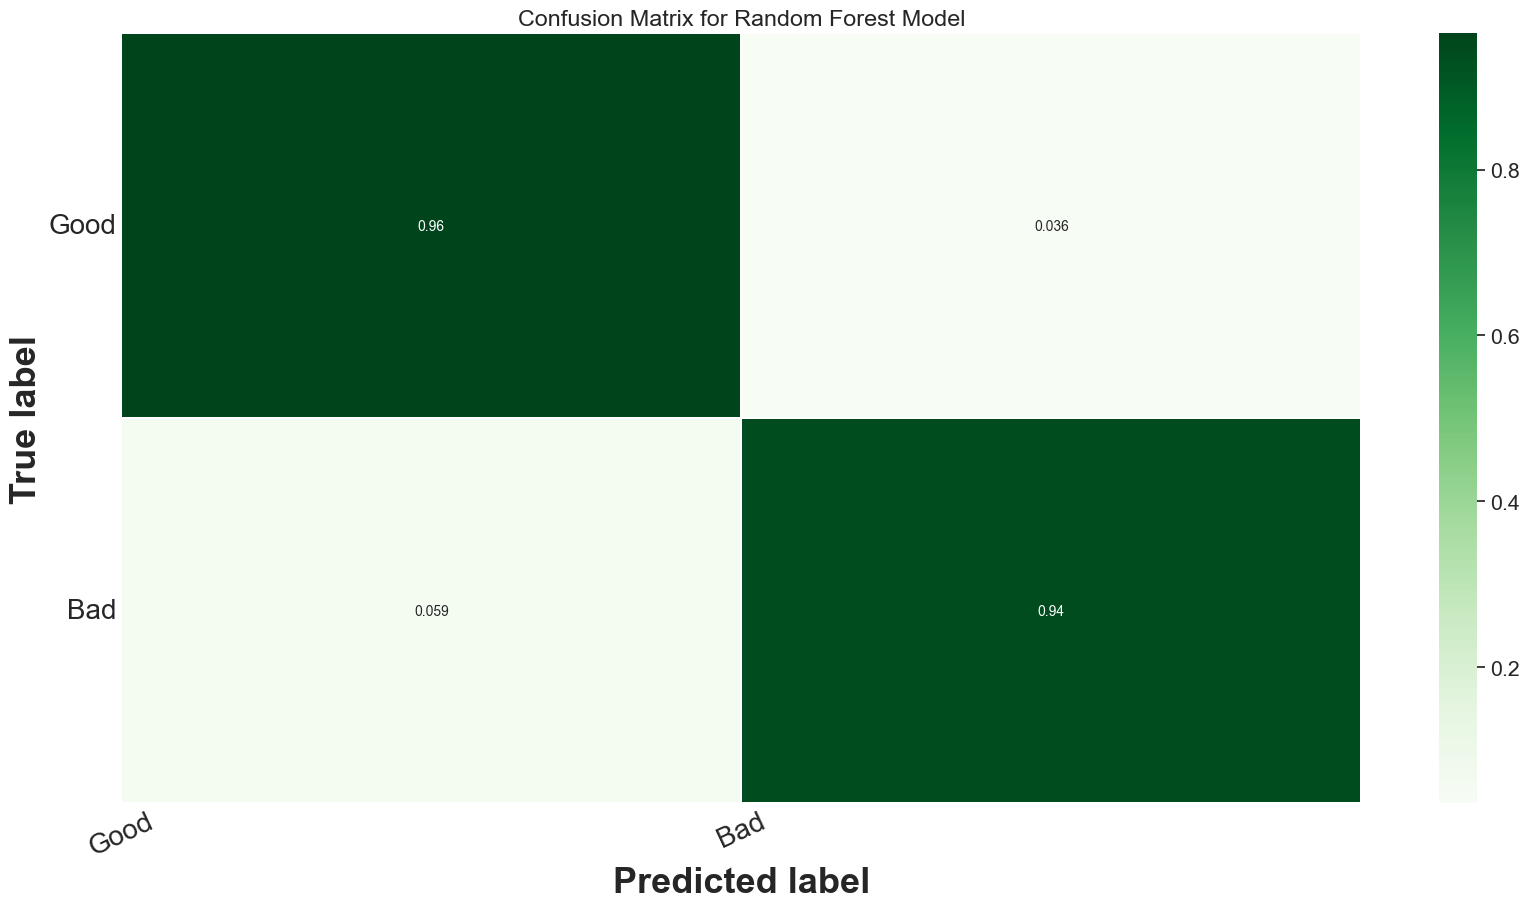

In [45]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, predictions_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
fig, ax1 = plt.subplots()

sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Good','Bad']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
ax1.set_xticks(tick_marks, class_names, rotation=25)
ax1.set_yticks(tick_marks2, class_names, rotation=0)
ax1.set_xlabel('Predicted label')
ax1.set_ylabel('True label')
ax1.set_title('Confusion Matrix for Random Forest Model')